<a href="https://colab.research.google.com/github/pmccthy/ML-playground/blob/main/autoencoders/vanilla_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Vanilla autoencoder models**

**Model 1**

First simple autoencoder model based on the tutorial at https://blog.keras.io/building-autoencoders-in-keras.html

In [29]:
%matplotlib inline
import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

We will create a simple model comprised of three densely connected layers, where the middle layer has fewer nodes than the input input layer (forming the encoder), and the third layer has the same number of nodes as the input layer (forming the decoder)

In [37]:
# params
input_dim = 784
comp_factor = 15
encoding_dim = input_dim//comp_factor 

In [38]:
# autoencoder model
input_sig = keras.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_sig)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = keras.Model(input_sig, decoded)
autoencoder.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_19 (Dense)            (None, 52)                40820     
                                                                 
 dense_20 (Dense)            (None, 784)               41552     
                                                                 
Total params: 82,372
Trainable params: 82,372
Non-trainable params: 0
_________________________________________________________________


In [39]:
# encoder model
encoder = keras.Model(input_sig, encoded)

In [40]:
# decoder model
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [41]:
# compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

we will train the model to reconstruct MNIST images

In [42]:
# load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# normalise valus between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [43]:
# train model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 4s 13ms/step - loss: 0.2536 - val_loss: 0.1719
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1533 - val_loss: 0.1360
Epoch 3/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1269 - val_loss: 0.1167
Epoch 4/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1118 - val_loss: 0.1049
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1018 - val_loss: 0.0966
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.0946 - val_loss: 0.0906
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0894 - val_loss: 0.0863
Epoch 8/50
235/235 [==============================] - 3s 12ms/step - loss: 0.0858 - val_loss: 0.0834
Epoch 9/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0833 - val_loss: 0.0814
Epoch 10/50
235/235 [==============================] - 3s 13ms/step - loss: 0.0817 - val_lo

In [44]:
# Encode and decode some digits from the test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

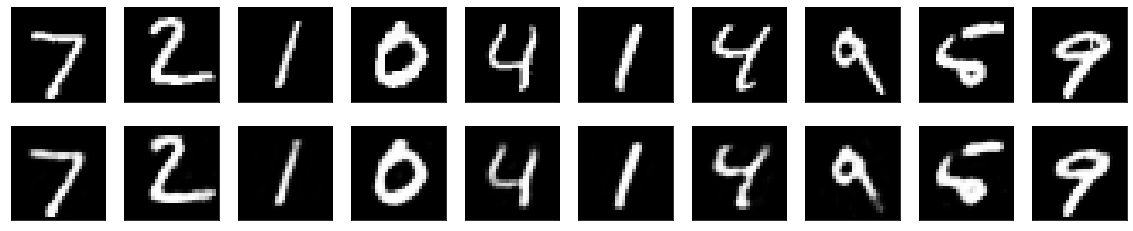

In [45]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()